# TRABAJO FINAL INTEGRADOR

### NOMBRE: GUIDO PETTINARI

### TUTOR: VALERIA SOLIANI

### UNIVERSIDAD: INSTITUTO TECNOLOGICO DE BUENOS AIRES (ITBA)

**El Trabajo se dividirá en**:

    1) Análisis Exploratorio Descriptivo
    2) Feature Engineering o Preparación de Datos
    3) Modelos Predictivos: Probaremos diferentes algoritmos predictivos

### Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,make_scorer,f1_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import seaborn as sns
import numpy as np
from mlxtend.evaluate import lift_score
import csv
from funpymodeling.exploratory import status

### Load CSVs

In [2]:
data_base = pd.read_csv('data_base.csv')
data_ohe = pd.read_csv('data_ohe.csv')
data_ohe_corr = pd.read_csv('data_ohe_corr.csv')
data_ohe_out = pd.read_csv('data_ohe_out.csv')
data_ohe_corr_out = pd.read_csv('data_ohe_out_corr.csv')
data_out = pd.read_csv('data_out.csv')
data_corr = pd.read_csv('data_corr.csv')
data_out_corr = pd.read_csv('data_out_corr.csv')
data_index = pd.read_csv('data_index.csv')


### Split All DF in Train and Test

In [3]:
data_base_X = data_base.drop(['MonthlyIncome_cat_encode'],axis=1)
data_base_y = data_base[['MonthlyIncome_cat_encode']]
data_ohe_X = data_ohe.drop(['MonthlyIncome_cat_encode'],axis=1)
data_ohe_y = data_ohe[['MonthlyIncome_cat_encode']]
data_ohe_corr_X = data_ohe_corr.drop(['MonthlyIncome_cat_encode'],axis=1)
data_ohe_corr_y = data_ohe_corr[['MonthlyIncome_cat_encode']]
data_ohe_out_X = data_ohe_out.drop(['MonthlyIncome_cat_encode'],axis=1)
data_ohe_out_y = data_ohe_out[['MonthlyIncome_cat_encode']]
data_ohe_corr_out_X = data_ohe_corr_out.drop(['MonthlyIncome_cat_encode'],axis=1)
data_ohe_corr_out_y = data_ohe_corr_out[['MonthlyIncome_cat_encode']]
data_out_X = data_out.drop(['MonthlyIncome_cat_encode'],axis=1)
data_out_y = data_out[['MonthlyIncome_cat_encode']]
data_corr_X = data_corr.drop(['MonthlyIncome_cat_encode'],axis=1)
data_corr_y = data_corr[['MonthlyIncome_cat_encode']]
data_out_corr_X = data_out_corr.drop(['MonthlyIncome_cat_encode'],axis=1)
data_out_corr_y = data_out_corr[['MonthlyIncome_cat_encode']]


In [4]:
# data_base

data_base_X_train, data_base_X_test, data_base_y_train, \
                                     data_base_y_test = train_test_split(data_base_X, data_base_y, test_size=0.3, random_state=42)

#data_ohe
data_ohe_X_train, data_ohe_X_test, data_ohe_y_train, \
                                   data_ohe_y_test = train_test_split(data_ohe_X, data_ohe_y, test_size=0.3, random_state=42)

#data_ohe_corr
data_ohe_corr_X_train, data_ohe_corr_X_test, data_ohe_corr_y_train, \
                       data_ohe_corr_y_test = train_test_split(data_ohe_corr_X, data_ohe_corr_y, test_size=0.3, random_state=42)

# data_ohe_out
data_ohe_out_X_train, data_ohe_out_X_test, data_ohe_out_y_train, \
                      data_ohe_out_y_test = train_test_split(data_ohe_out_X, data_ohe_out_y, test_size=0.3, random_state=42)

# data_ohe_corr_out
data_ohe_corr_out_X_train, data_ohe_corr_out_X_test, data_ohe_corr_out_y_train, \
                           data_ohe_corr_out_y_test = train_test_split(data_ohe_corr_out_X, data_ohe_corr_out_y, test_size=0.3, random_state=42)

# data_out
data_out_X_train, data_out_X_test, data_out_y_train, \
                           data_out_y_test = train_test_split(data_out_X, data_out_y, test_size=0.3, random_state=42)

# data_corr
data_corr_X_train, data_corr_X_test, data_corr_y_train, \
                           data_corr_y_test = train_test_split(data_corr_X, data_corr_y, test_size=0.3, random_state=42)

# data_out_corr
data_out_corr_X_train, data_out_corr_X_test, data_out_corr_y_train, \
                           data_out_corr_y_test = train_test_split(data_out_corr_X, data_out_corr_y, test_size=0.3, random_state=42)

In [ ]:
data_ohe_X_train.describe()

### Grid Search

In [ ]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 50)]
n_estimators = range(2, 100, 10)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = range(2, 42, 2)

# Minimum number of samples required to split a node
min_samples_split = range(2,100,20)
# Minimum number of samples required at each leaf node
min_samples_leaf = range(2,100,20)
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
               #'bootstrap': bootstrap}
print(random_grid)


In [ ]:




scoring = {'lift':make_scorer(lift_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'f1_score':make_scorer(f1_score, average='macro'),
           'accuracy': make_scorer(accuracy_score),
           'recall':make_scorer(recall_score,average='macro'),
           'roc_auc_ovr':'roc_auc_ovr'}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(estimator = rf, 
                               param_grid = random_grid,
                               scoring = scoring,
                               refit='accuracy',
                               cv = 5, 
                               verbose=1, 
                               n_jobs = -1)


# list dataframes train that Random Forest accepts
list_dataframes_train = [#[data_base_X_train, data_base_X_test],
                         [data_ohe_X_train, data_ohe_y_train],
                         [data_ohe_corr_X_train, data_ohe_corr_y_train],
                         [data_ohe_out_X_train, data_ohe_out_y_train],
                         [data_ohe_corr_out_X_train, data_ohe_corr_out_y_train]
                         #[data_out_X, data_out_y],
                         #[data_corr_X, data_corr_y],
                         #[data_out_corr_X, data_out_corr_y]
                         ]

# list dataframes train that Random Forest accepts
list_dataframes_test = [#[data_base_X_train, data_base_X_test],
                         [data_ohe_X_test, data_ohe_y_test],
                         [data_ohe_corr_X_test, data_ohe_corr_y_test],
                         [data_ohe_out_X_test, data_ohe_out_y_test],
                         [data_ohe_corr_out_X_test, data_ohe_corr_out_y_test]
                         #[data_out_X, data_out_y],
                         #[data_corr_X, data_corr_y],
                         #[data_out_corr_X, data_out_corr_y]
                         ]


list_dataframes_names = ['data_ohe','data_ohe_corr','data_ohe_out','data_ohe_corr_out']

In [ ]:
# Fit the random search model
df = pd.DataFrame()
for i in range(0,len(list_dataframes_train)):
    #Entreno sobre mis dataframes train  
    rf_random.fit(list_dataframes_train[i][0], list_dataframes_train[i][1].values.ravel())
    len_name = len(rf_random.cv_results_['mean_test_accuracy'])
    name = [list_dataframes_names[i]]*len_name

    train_results = pd.concat([
                     pd.DataFrame(name,columns=['dataframe']),
                     pd.DataFrame(rf_random.cv_results_['params']),
                     pd.DataFrame(rf_random.cv_results_['mean_test_lift'],columns=['lift']),          
                     pd.DataFrame(rf_random.cv_results_['mean_test_accuracy'],columns=['accuracy']),
                     pd.DataFrame(rf_random.cv_results_['mean_test_precision'],columns=['precision_score']),
                     pd.DataFrame(rf_random.cv_results_['mean_test_recall'],columns=['recall']),
                     pd.DataFrame(rf_random.cv_results_['mean_test_f1_score'],columns=['f1_score']),
                     pd.DataFrame(rf_random.cv_results_['mean_test_roc_auc_ovr'],columns=['roc_auc_ovr'])],axis=1).sort_values('lift',ascending=False)
    df = df.append(train_results) 
df.to_csv('train_rf_results_v3.csv',index=False)

In [5]:
# A continuación correremos con los parametros que nos dió mejor resultado tanto el training como el testing y los graficaremos 
# con una curva de ROC

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(n_estimators= 42,
                            max_features= 'auto',
                            max_depth= 28,
                            min_samples_split= 62,
                            min_samples_leaf= 2,
                            random_state=42)


rf.fit(data_ohe_X_train, data_ohe_y_train)


C:\Users\guido\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=28, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=62,
                       min_weight_fraction_leaf=0.0, n_estimators=42,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Classification report

In [7]:

y_pred_tr = rf.predict(data_ohe_X_train)
y_pred_ts = rf.predict(data_ohe_X_test)


print('ACCURACY TRAIN:' + str(accuracy_score(data_ohe_y_train,y_pred_tr)))
print('ACCURACY TEST:' + str(accuracy_score(data_ohe_y_test,y_pred_ts)))
print('PRECISION TRAIN:' + str(precision_score(data_ohe_y_train,y_pred_tr,average='weighted')))
print('PRECISION TEST:' + str(precision_score(data_ohe_y_test,y_pred_ts,average='weighted')))
print('RECALL TRAIN:' + str(recall_score(data_ohe_y_train,y_pred_tr,average='weighted')))
print('RECALL TEST:' + str(recall_score(data_ohe_y_test,y_pred_ts,average='weighted')))
print('F1SCORE TRAIN:' + str(f1_score(data_ohe_y_train,y_pred_tr,average='weighted')))
print('F1SCORE TEST:' + str(f1_score(data_ohe_y_test,y_pred_ts,average='weighted')))
#print('AUC SCORE TRAIN:' + str(roc_auc_score(data_ohe_y_train,y_pred_tr,multi_class='ovr',average='weighted')))
#print('AUC SCORE TEST:' + str(roc_auc_score(data_ohe_y_test,y_pred_ts,multi_class='ovr',average='weighted')))
#print('LIFT:' + str(make_scorer(lift_score(data_ohe_y_train,y_pred_tr))))
#print('LIFT:' + str(make_scorer(lift_score(data_ohe_y_test,y_pred_ts))))

print(classification_report(data_ohe_y_train,y_pred_tr))
print(classification_report(data_ohe_y_test,y_pred_ts))

ACCURACY TRAIN:0.7628765792031098
ACCURACY TEST:0.6780045351473923
PRECISION TRAIN:0.7634569341100809
PRECISION TEST:0.6632789819912555
RECALL TRAIN:0.7628765792031098
RECALL TEST:0.6780045351473923
F1SCORE TRAIN:0.747409756595952
F1SCORE TEST:0.6624781057784628
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       279
           1       0.74      0.41      0.53       262
           2       0.70      0.77      0.74       226
           3       0.89      0.94      0.91       262

    accuracy                           0.76      1029
   macro avg       0.76      0.76      0.75      1029
weighted avg       0.76      0.76      0.75      1029

              precision    recall  f1-score   support

           0       0.62      0.81      0.71        90
           1       0.51      0.32      0.39       104
           2       0.70      0.71      0.71       141
           3       0.79      0.88      0.83       106

    accuracy                  

In [ ]:
# Con el mejor parametro del grid search paso a predecir
#y_pred_tr = rf_random.predict(X_train)
#accuracy_score = accuracy_score(y_train, y_pred_tr)
#precision_score = precision_score(y_train, y_pred_tr)
#recall_score = recall_score(y_train, y_pred_tr)
#roc_auc_score = roc_auc_score(y_train, y_pred_tr)
#lift_score = lift_score(y_train, y_pred_tr)

pd.unique(data_ohe_y_train['MonthlyIncome_cat_encode'])


C:\Users\guido\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\guido\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


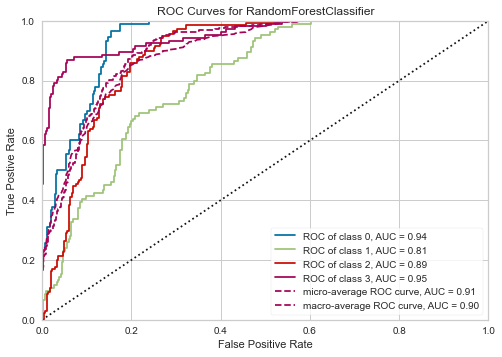

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [8]:
from yellowbrick.classifier import ROCAUC,PrecisionRecallCurve,ClassBalance
from yellowbrick.target import FeatureCorrelation

visualizer = ROCAUC(rf, classes=["0","1","2","3"])

visualizer.fit(data_ohe_X_train,data_ohe_y_train)
visualizer.score(data_ohe_X_test,data_ohe_y_test)
visualizer.show()